<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Visualização de Dados
---

# Conteúdo

- Revisão da última aula

- Visualização de Dados Não-Convencionais

- Dados temporais
     - Gráficos com uma variável contínua ao longo do tempo

## Visualização de Dados Não-Convencioanis

- Nos dados convencionais, cada instância do problema é representada por um número de atributos

- Em dados não convencionais não existe essa regra clara, e muitas vezes é necessário transformar os dados em algum formato específico para que seja possível aplicar os métodos existentes para dados convencionais, de forma a não precisar criar novos métodos

- A visualização de dados não convencionais é diversa e depende dos dados que estamos analisando
    - Em dados temporais é comum utilizar o tempo no eixo das abcissas (ou eixo x)
    - Em dados sequenciais é comum utilizar também o eixo das abcissas para definir a sequência dos dados
    - Em dados geográficos temporais é comum os eixos das abcissas (eixo x) e das ordenadas (eixo y) para longitude e latitude, respectivamente, sendo que o tempo é dificíl de ser representado    

## Dados Temporais

- Um conjunto de dados temporal univariado (ou uma série temporal univariada) pode ser definido como sequência temporalmente ordenada de valores de uma variável 

$$\mathbf{x} = \langle(t_1, x_1), (t_2, x_2), \ldots, (t_m, x_m) )\rangle$$

- Um conjunto de dados temporal multivariado (ou uma série temporal multivariada) pode ser definida como uma sequência temporalmente ordenada de valores de múltiplas variáveis

$$ \mathbf{x} =  
 \begin{matrix}
  \langle(t_1, & x_{1,1}, & x_{1,2}, & \ldots, & x_{1,d}), \\
  (t_2, & x_{2,1}, & x_{2,2}, & \ldots, & x_{2,d}), \\
  \ldots \\
  (t_m, & x_{m,1}, & x_{m,2}, & \ldots, & x_{m,d})\rangle
  \end{matrix}
$$


In [1]:
library(ggplot2)

- Exemplo de conjunto de dados de inidicadores economicos dos Estados Unidos

In [2]:
head(economics)

date       pce   pop    psavert uempmed unemploy
1 1967-07-01 507.4 198712 12.5    4.5     2944    
2 1967-08-01 510.5 198911 12.5    4.7     2945    
3 1967-09-01 516.3 199113 11.7    4.6     2958    
4 1967-10-01 512.9 199311 12.5    4.9     3143    
5 1967-11-01 518.1 199498 12.5    4.7     3066    
6 1967-12-01 525.8 199657 12.1    4.8     3018

- O conjunto de dados possui as colunas:
    - **date**: data da coleta de dados mensal desde 1967    
    - **pce**: despesas com consumo pessoal (em bilhões de dólares)
    - **pop**: população total (em milhares)
    - **psavert**: percentual do salário para poupança pessoal (%)
    - **uempmed**: tempo médio de desemprego (em semanas)
    - **unemploy**: número de desempregados (em milhares)

### Gráficos com uma variável contínua ao longo do tempo

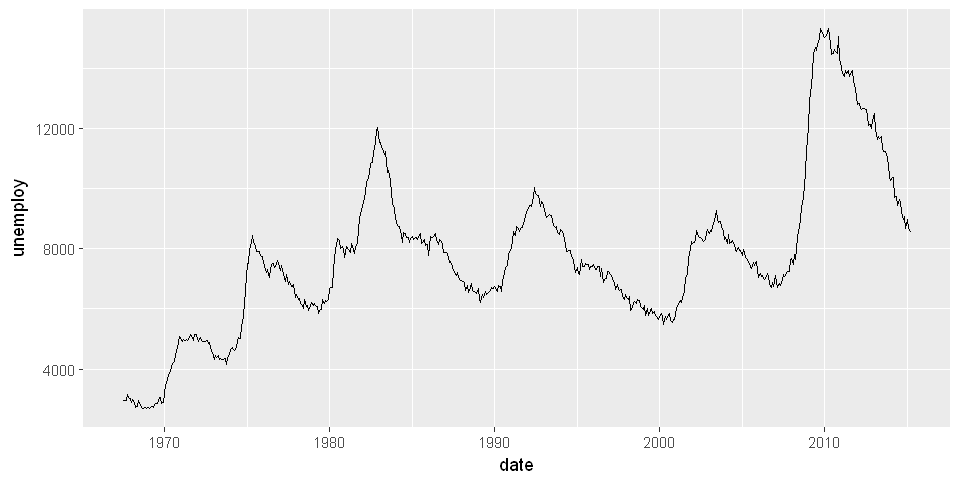

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line()

#### Tendência linear dos dados (global linear regression)

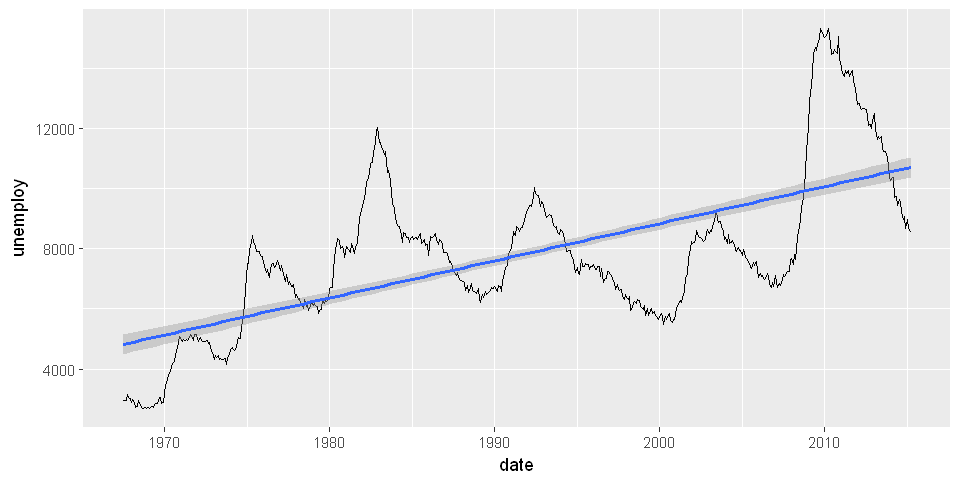

In [4]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth(method = lm)

#### Tendência nos dados (loess - local linear regression)

`geom_smooth()` using method = 'loess'


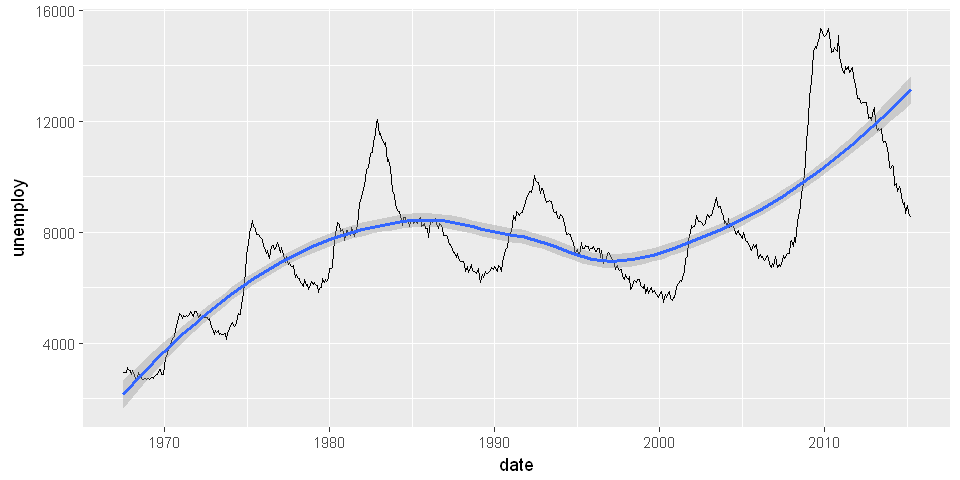

In [5]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth()

O parámetro **span** é util para ajustar tendências mais globais ou mais específicas, onde as globais utilizam um valor de *span* mais próximo de 1 e as mais específica um valor mais próximo de 0.

`geom_smooth()` using method = 'loess'


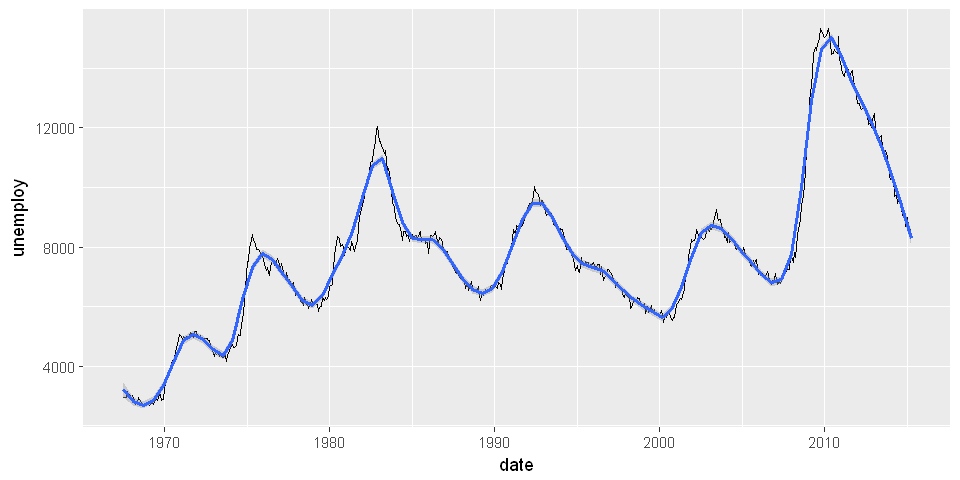

In [6]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth(span = 0.1)

In [7]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth(span = 0.3)

`geom_smooth()` using method = 'loess'


In [8]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth(span = 0.5)

`geom_smooth()` using method = 'loess'


In [9]:
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line() + geom_smooth(span = 1)

`geom_smooth()` using method = 'loess'


#### Procurando minimos locais e máximos locais na série temporal

- Para visualizar mínimos e máximos locais podemos usar as funções **stat_valleys** e **stat_peaks**. Essas funções também tem um parâmetro chamado de **span** que por *default* é 5. 

- Para **stat_valleys** isso significa que dado um ponto central, se os dois elementos à esquerda e à direita forem maiores do que o elemento central, então ele é um vale, isto é considera uma janela de tamanho 5.

- Para **stat_peaks** isso significa que dado um ponto central, se os dois elementos à esquerda e à direita forem menores do que o elemento central, então ele é um pico.

- Então quanto maior seja o valor de **span** maior é a janela considerada e menos pontos serão picos ou vales.

In [10]:
library(ggpmisc)
ggplot(data=economics[1:100,], aes(x=date, y=uempmed)) + geom_line() + geom_point(size = 0.7) + stat_peaks(colour = "red") + stat_valleys(colour = "blue")

### Atividade

- Para cada variável do conjunto de dados *economics* gerar:
    1. Um gráfico de uma variável contínua ao longo do tempo
    2. Gráficos com curva suavizada para 3 (cinco) valores de span: 0.1, 0.5 e 1.0
    3. Gráficos mostrando valores máximos e mínimos para 3 valores de span: 5, 9 e 13